# 数字图像处理实验五



## 任务1

- 自己实现均值滤波，中值滤波

- 并和程序库自带的版本（Matlab、Pillow、OpenCV或者其他图像库）进行结果对比。

- 至少在“space.png”“ mona.png”上进行测试。


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
space = cv2.imread("Space.png")
mona = cv2.imread("Mona.png")

In [3]:
def show(imglist:list):
    for id,img in enumerate(imglist):
        cv2.imshow(f"{id}",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
def show_plt(imglist):
    for img in imglist:
        plt.imshow(img[:,:,::-1])
        plt.show()

In [5]:
def mean_filter(img,kernal=(3,3)):
    '''
    img:原图像
    kernal:核尺寸
    '''
    mean_img = img.copy()
    rows,cols,_ = img.shape
    krows,kcols = kernal
    w = int(krows/2)
    h = int(kcols/2)
    for i in range(w,rows-w):
        for j in range(h,cols-h): # 遍历取平均值
            block = img[i-w:i+w+1, j-h:j+h+1] # 注意block范围
            m = np.mean(block,dtype=np.float32)
            mean_img[i][j] = int(m)
    return mean_img


In [6]:
%%time
space_mean_opencv = cv2.blur(space, (3,3))

Wall time: 0 ns


In [7]:
%%time
space_mean = mean_filter(space,(3,3))

Wall time: 3.84 s


In [8]:
cv2.imwrite("space_mean.png",space_mean)
cv2.imwrite("space_mean_opencv.png",space_mean_opencv)
spacelist = [space,space_mean,space_mean_opencv]

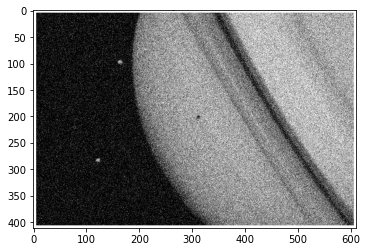

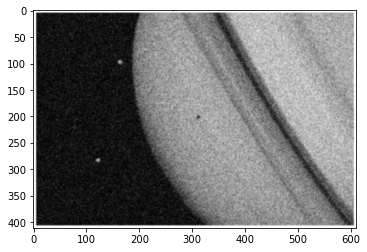

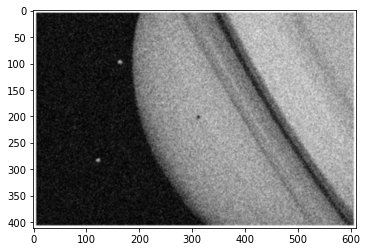

In [9]:
show_plt(spacelist)

In [10]:
show(spacelist)

In [11]:
%%time
mona_mean_opencv = cv2.blur(mona, (5,5))

Wall time: 1 ms


In [12]:
%%time
mona_mean = mean_filter(mona,(5,5))

Wall time: 3.78 s


In [13]:
cv2.imwrite("mona_mean.png",mona_mean)
cv2.imwrite("mona_mean_opencv.png",mona_mean_opencv)
monalist = [mona,mona_mean,mona_mean_opencv]

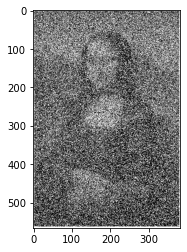

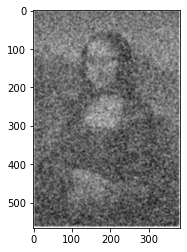

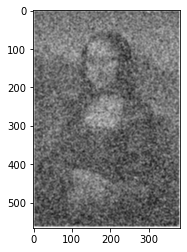

In [14]:
show_plt(monalist)

In [15]:
show(monalist)

In [16]:
def median_filter(img,kernalsize = 3):
    '''
    img:原图像
    kernalsize:核尺寸
    '''
    median_img = img.copy()
    rows,cols,_ = img.shape
    w = int(kernalsize/2)
    for i in range(w,rows-w):
        for j in range(w,cols-w): # 遍历取平均值
            block = img[i-w:i+w+1, j-w:j+w+1]
            m = np.median(block)
            median_img[i][j] = int(m)
    return median_img


In [17]:
%%time
space_media_opencv = cv2.medianBlur(space, 5)

Wall time: 999 µs


In [18]:
%%time
space_media = median_filter(space,5)

Wall time: 6.48 s


In [19]:
cv2.imwrite("space_media.png",space_media)
cv2.imwrite("space_media_opencv.png",space_media_opencv)
spacelistmedia = [space,space_media,space_media_opencv]

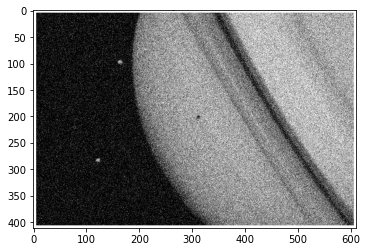

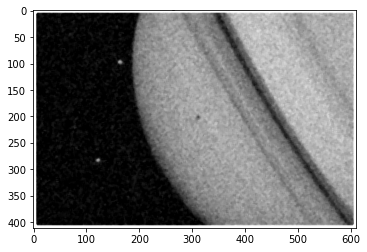

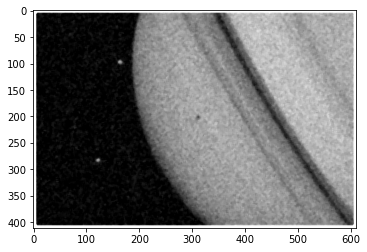

In [20]:
show_plt(spacelistmedia)

In [21]:
show(spacelistmedia)

In [22]:
%%time
mona_media_opencv = cv2.medianBlur(mona, 5)

Wall time: 2 ms


In [23]:
%%time
mona_media = median_filter(mona,5)

Wall time: 5.65 s


In [24]:
cv2.imwrite("mona_media.png",mona_media)
cv2.imwrite("mona_media_opencv.png",mona_media_opencv)
monalistmedia = [mona,mona_media,mona_media_opencv]

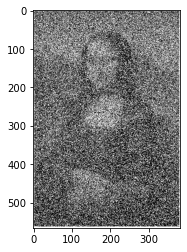

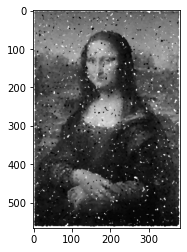

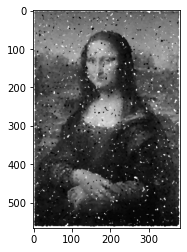

In [25]:
show_plt(monalistmedia)

In [26]:
show(monalistmedia)

In [27]:
supermona = mona.copy()
for i in range(4):
    supermona = cv2.medianBlur(supermona,5)

滤了太多次就没有效果了

In [28]:
cv2.imshow(f"supermona",supermona)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 任务2

请编写代码，将star.tif中较小的行星去除掉（使用平滑滤波器和阈值处理）。 

In [29]:
star = cv2.imread("star.tif",0)

In [30]:
star_mean = cv2.blur(star,(15,15))
starlist = [star,star_mean]
show(starlist)

In [31]:
_,th = cv2.threshold(star_mean,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [32]:
show([star,th])

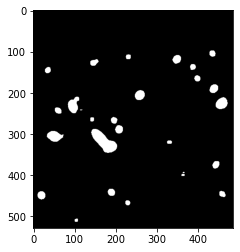

In [33]:
plt.imshow(th)
plt.set_cmap('gray')
plt.show()